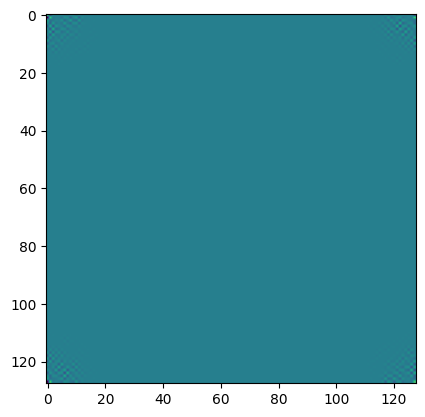

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f = np.load("test_ctfs.npy")
g = np.load("images_from_structures.npy")
plt.imshow(np.real(np.fft.fft2(g[0].reshape(128, 128))))

plt.show()

In [4]:
def centering(large_mat):
    for i in range(large_mat.shape[0]):
        for j in range(large_mat.shape[1]):
            large_mat[i, j] = large_mat[i, j] * -(1 ** (i + 1 + j + 1))
    return large_mat

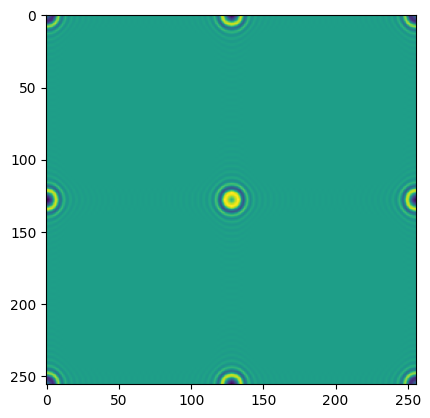

In [5]:
large_mat = np.zeros((256, 256), dtype=np.complex128)
large_ctf = np.zeros((256, 256), dtype=np.complex128)
mat = g[0].reshape(128, 128)
ctf = f[0].reshape(128, 128)
large_mat[0:128, 0:128] = mat
large_ctf[64 : 64 + 128, 64 : 64 + 128] = np.fft.fftshift(ctf)

# subplot 1
plt.imshow(np.real(np.fft.fft2(np.fft.fftshift(large_mat))))

# subplot 2
plt.imshow(np.real(np.fft.fft2(np.fft.fftshift(large_ctf))))

plt.show()

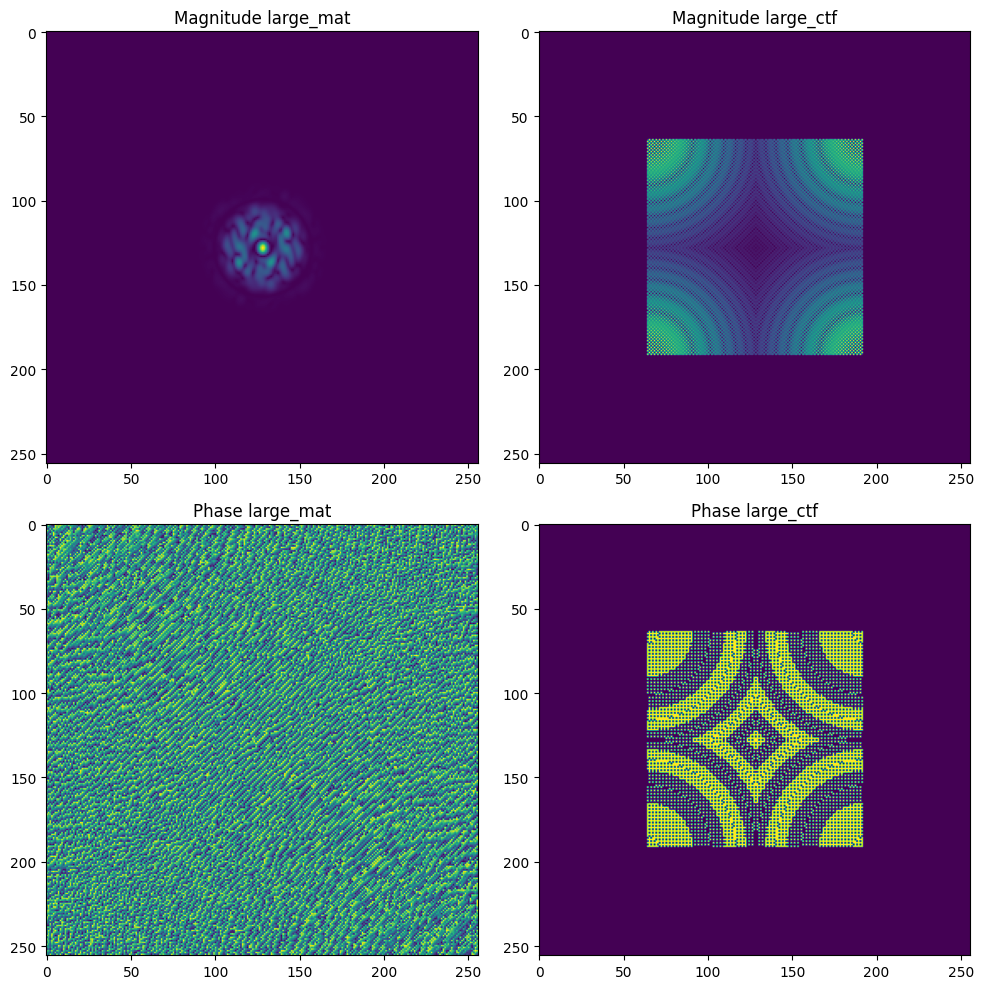

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data and create large matrices
large_mat = np.zeros((256, 256), dtype=np.complex128)
large_ctf = np.zeros((256, 256), dtype=np.complex128)

# Reshape the data and embed into the large matrices
mat = g[0].reshape(128, 128)
ctf = f[0].reshape(128, 128)
large_mat[0:128, 0:128] = mat
offt = 64
large_ctf[offt : offt + 128, offt : offt + 128] = ctf
large_filter = np.fft.fftshift(large_ctf)

# Calculate FFT and FFT shift for large matrices
fft_large_mat = np.fft.fftshift(np.fft.fft2(large_mat))
fft_large_ctf = large_ctf  # np.fft.fftshift(np.fft.fft2(large_ctf))

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot magnitude and phase for large_mat
axs[0, 0].imshow(np.abs(fft_large_mat))
axs[0, 0].set_title("Magnitude large_mat")
axs[1, 0].imshow(np.angle(fft_large_mat))
axs[1, 0].set_title("Phase large_mat")

# Plot magnitude and phase for large_ctf
axs[0, 1].imshow(np.abs(fft_large_ctf))
axs[0, 1].set_title("Magnitude large_ctf")
axs[1, 1].imshow(np.angle(fft_large_ctf))
axs[1, 1].set_title("Phase large_ctf")

# Show the subplots
plt.tight_layout()
plt.show()

In [27]:
def conv_jax_apply_am2_to_bm1(x, ctf):
    # assume h is in frequency domain and therefore just needs to be centered
    h_window = np.zeros((256, 256), dtype=np.complex128)
    # print(.m2.shape)
    cx, cy = int(1 / 2 * 128), int(3 / 2 * 128)
    h_window[64 : 64 + 128, 64 : 64 + 128] = ctf
    # assume x is in spatial domain and therefore needs to be centered and transformed
    x_window = np.zeros((256, 256), dtype=np.complex128)

    x_window[0:128, 0:128] = x
    x_window = np.fft.fftshift(np.fft.fft2(x_window))

    # keep upper left corner
    G = np.real(np.fft.ifftshift(np.fft.ifft2(x_window * h_window))[0:128, 0:128])

    return x_window

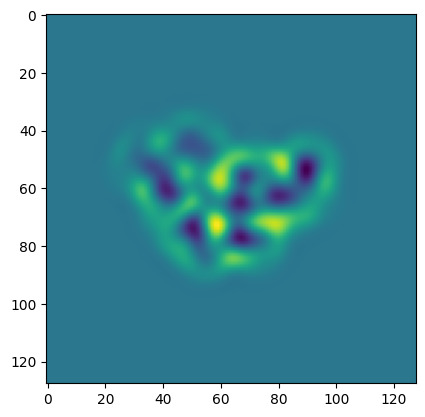

In [25]:
plt.imshow(mat)
plt.show()

plt.imshow(conv_jax_apply_am2_to_bm1())

(256, 256)


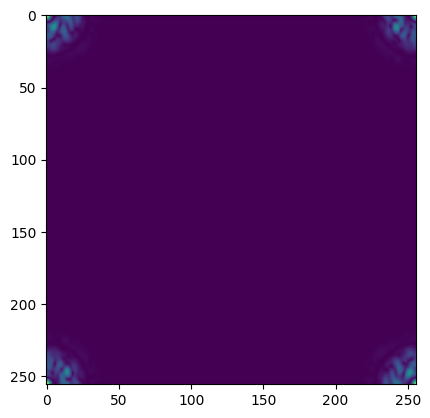

In [28]:
plt.imshow(np.abs(mat))
r = conv_jax_apply_am2_to_bm1(mat, ctf)
print(r.shape)
plt.imshow(np.abs(r))

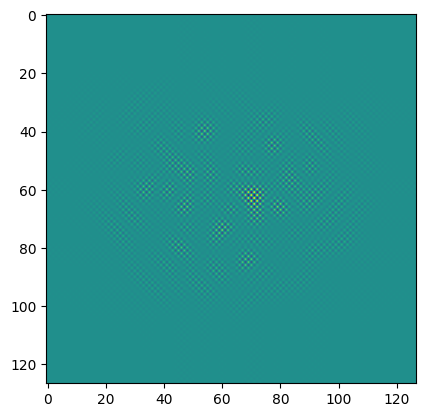

In [9]:
plt.imshow(
    np.fft.fftshift(np.real(np.fft.ifft2(fft_large_ctf * fft_large_mat)))[0:127, 0:127]
)
plt.show()

In [10]:
real_filter

NameError: name 'real_filter' is not defined